In [ ]:
import cv2
import face_recognition
import numpy as np
from IPython.display import display, Image as IPImage
from ipywidgets import widgets, FileUpload
import io
from PIL import Image


In [ ]:
# Widget for uploading an image
upload_widget = FileUpload(accept='image/*', multiple=False)
display(upload_widget)


FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
def load_image(upload_widget):
    if not upload_widget.value:
        raise ValueError("Please upload an image.")

    uploaded_file = next(iter(upload_widget.value.values()))
    content = uploaded_file['content']

    image = Image.open(io.BytesIO(content))
    image = np.array(image)

    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image_bgr

try:
    known_image_bgr = load_image(upload_widget)
    print("Known image loaded.")
    known_image_rgb = cv2.cvtColor(known_image_bgr, cv2.COLOR_BGR2RGB)
    print("Known image converted to RGB.")

    # Ensure at least one face is detected and encoded in the known image
    known_face_encodings = face_recognition.face_encodings(known_image_rgb)
    if not known_face_encodings:
        raise ValueError("No faces found in the known image. Please upload a clear image with a visible face.")
    known_face_encoding = known_face_encodings[0]
    print("Known image encoded successfully.")
except ValueError as e:
    print(e)


Known image loaded.
Known image converted to RGB.
Known image encoded successfully.


In [ ]:
upload_widget_recognition = FileUpload(accept='image/*', multiple=False)
display(upload_widget_recognition)


FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
def recognize_faces(upload_widget_recognition):
    if not upload_widget_recognition.value:
        raise ValueError("Please upload an image for recognition.")

    uploaded_file = next(iter(upload_widget_recognition.value.values()))
    content = uploaded_file['content']

    image = Image.open(io.BytesIO(content))
    image = np.array(image)
    print("Recognition image loaded.")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    print("Recognition image converted to RGB.")

    face_locations = face_recognition.face_locations(image_rgb)
    face_encodings = face_recognition.face_encodings(image_rgb, face_locations)
    print(f"Detected {len(face_encodings)} faces in the recognition image.")

    if not face_encodings:
        raise ValueError("No faces found in the uploaded recognition image. Please try another image.")

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
        name = "Unknown"
        if True in matches:
            name = "Known Person"

        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.rectangle(image, (left, bottom - 35), (right, bottom), (0, 255, 0), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    return image

try:
    recognized_image = recognize_faces(upload_widget_recognition)
    print("Faces recognized and labeled.")

    # Convert the image back to RGB for displaying
    recognized_image_rgb = cv2.cvtColor(recognized_image, cv2.COLOR_BGR2RGB)
    recognized_image_pil = Image.fromarray(recognized_image_rgb)
    print("Converted image back to PIL format for display.")

    # Save the image to a file to verify it's correctly created
    recognized_image_pil.save("recognized_image.png")
    print("Image saved to file 'recognized_image.png'.")

    # Display the saved image
    display(IPImage(filename="recognized_image.png"))
    print("Image displayed successfully.")
except ValueError as e:
    print(e)


Recognition image loaded.
Recognition image converted to RGB.
Detected 1 faces in the recognition image.
Faces recognized and labeled.
Converted image back to PIL format for display.
Image saved to file 'recognized_image.png'.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved image using PIL
try:
    saved_image = Image.open("recognized_image.png")
    saved_image.show()
    print("Image opened and displayed using PIL successfully.")
except Exception as e:
    print(f"Error opening image: {e}")



Image opened and displayed using PIL successfully.


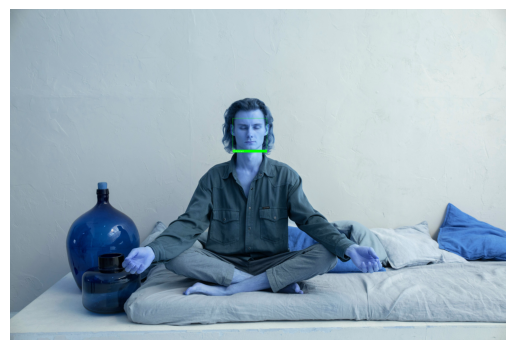

Image displayed using matplotlib successfully.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the saved image using matplotlib
try:
    img = mpimg.imread("recognized_image.png")
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    print("Image displayed using matplotlib successfully.")
except Exception as e:
    print(f"Error displaying image using matplotlib: {e}")
